In [ ]:
!unzip /content/2zpbjs22k3-1.zip

In [ ]:
import glob
path = glob.glob("/content/Indonesian news corpus/json/*.json")

In [ ]:
import json
isi = []
kategori = []
for _ in path:
  f = open(_)
  data = json.load(f)
  for i in data:
    isi.append(i['isi'])
  for i in data:
    kategori.append(i['kategori'])
  f.close()

In [ ]:
import pandas as pd
kategori_ = list(pd.unique(pd.Series(kategori)))

In [ ]:
import re
berita = []
kelas = []
for count, _ in enumerate(kategori_):
  for i in range(len(isi)):
    if kategori[i] == _:
      if len(berita) < (count+1)*1250:
        isi[i]=isi[i].lower()
        isi[i]=re.sub('[^ A-Za-z]','',isi[i])
        berita.append(' '.join(isi[i].split()[3:]))
        kelas.append(count)

In [ ]:
kata = pd.read_fwf('/content/Laskar Pelangi.txt')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer  
tfidfvectorizer = TfidfVectorizer(use_idf=True)
tfidfvectorizer.fit(kata['Laskar Pelangi'])

TfidfVectorizer()

In [ ]:
import numpy as np
kosakata = tfidfvectorizer.get_feature_names_out()
kosakata = np.array(kosakata)

In [ ]:
kata_baru = []
for _ in berita:
  kalimat_ = np.asarray(_.split(' '))
  kata_baru_ = kalimat_[np.array([kata not in kosakata for kata in kalimat_]) == True]
  kata_baru.append(kata_baru_)

In [ ]:
berita_ = []
sebanyak_ini = 50
for count, _ in enumerate(berita):
  kodok = tfidfvectorizer.transform([_]).todense()
  kata_penting = np.argsort(np.asarray(kodok.sum(axis=0)).ravel())[::-1]
  kata_teratas = kosakata[kata_penting[:sebanyak_ini]]
  kata_baru_dan_kata_teratas = np.concatenate((kata_baru[count], kata_teratas))[:sebanyak_ini]
  berita_.append(" ".join(kata_baru_dan_kata_teratas))

In [ ]:
import numpy as np
data_ = pd.DataFrame(pd.DataFrame([np.asarray(berita_), np.asarray(kelas)]).values.T)
data_.to_csv("nlpdone2.csv")

In [ ]:
import pandas as pd
data = pd.read_csv('nlpdone2.csv')

In [ ]:
x = data.iloc[:,1].values
y = data.iloc[:,2].values

In [ ]:
x_ = []
for _ in x:
  x_.append(_)

In [ ]:
y_ = []
for _ in y:
  y_.append(_)

In [ ]:
import random
import numpy as np
b = list(zip(x_, y_))
random.shuffle(b)
x_, y_ = zip(*b)
x_ = list(x_)
y_ = list(y_)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer  
tfidfvectorizer_ = TfidfVectorizer(use_idf=True, max_features=100)
tfidfvectorizer_.fit(x_)

TfidfVectorizer(max_features=100)

In [ ]:
x_t = tfidfvectorizer_.transform(x_).toarray()

In [ ]:
tfidfvectorizer_.get_feature_names()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(x_t, y_)

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_t, y_)

from sklearn.ensemble import RandomForestClassifier
ran = RandomForestClassifier(max_depth=2, random_state=0)
ran.fit(x_t, y_)

from sklearn import svm
cls = svm.SVC()
cls.fit(x_t, y_)

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=1, max_iter=300)
mlp.fit(x_t, y_)

from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier(alpha=1.0)
ridge.fit(x_t, y_)

from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
sgd = make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000, tol=1e-3))
sgd.fit(x_t, y_)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

In [ ]:
print(neigh.score(x_t, y_))
print(clf.score(x_t, y_))
print(ran.score(x_t, y_))
print(cls.score(x_t, y_))
print(mlp.score(x_t, y_))
print(ridge.score(x_t, y_))
print(sgd.score(x_t, y_))

0.6785
0.5412
0.5137
0.7285
0.7585
0.6545
0.6208


In [ ]:
cls_pred = cls.predict(x_t)

In [ ]:
mlp_pred = mlp.predict(x_t)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


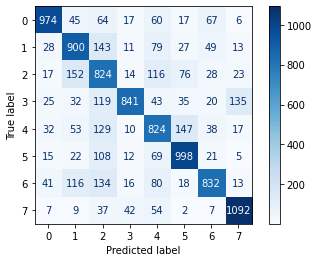

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score
plot_confusion_matrix(cls.fit(x_t, y_), x_t, y_, sample_weight=None, normalize=None, display_labels=None, include_values=True, xticks_rotation='horizontal', values_format=None, cmap=plt.cm.Blues, ax=None)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


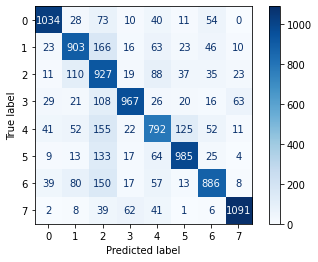

In [ ]:
plot_confusion_matrix(mlp.fit(x_t, y_), x_t, y_, sample_weight=None, normalize=None, display_labels=None, include_values=True, xticks_rotation='horizontal', values_format=None, cmap=plt.cm.Blues, ax=None)

In [ ]:
from sklearn.metrics import classification_report
print (classification_report(y_, cls_pred))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1250
           1       0.68      0.72      0.70      1250
           2       0.53      0.66      0.59      1250
           3       0.87      0.67      0.76      1250
           4       0.62      0.66      0.64      1250
           5       0.76      0.80      0.78      1250
           6       0.78      0.67      0.72      1250
           7       0.84      0.87      0.86      1250

    accuracy                           0.73     10000
   macro avg       0.74      0.73      0.73     10000
weighted avg       0.74      0.73      0.73     10000



In [ ]:
print (classification_report(y_, mlp_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1250
           1       0.74      0.72      0.73      1250
           2       0.53      0.74      0.62      1250
           3       0.86      0.77      0.81      1250
           4       0.68      0.63      0.65      1250
           5       0.81      0.79      0.80      1250
           6       0.79      0.71      0.75      1250
           7       0.90      0.87      0.89      1250

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.77      0.76      0.76     10000

